**The CASINO technique**

Our goal is to generate random number in a range from 0 up to 10M with "flat" distribution - each number chould have equal chance

In [16]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [66]:
data = [random.random() for _ in range(10**3)]

In [68]:
def show_distribution(func):
    plt.figure(figsize=(10,7))
    for i in range(4):
        ax = plt.subplot(2,2,i+1)
        data = [func() for _ in range(10**3)]
        sns.distplot(data, color="g", kde_kws={"shade": True}, ax=ax)

Let's analyze distribution of standard random

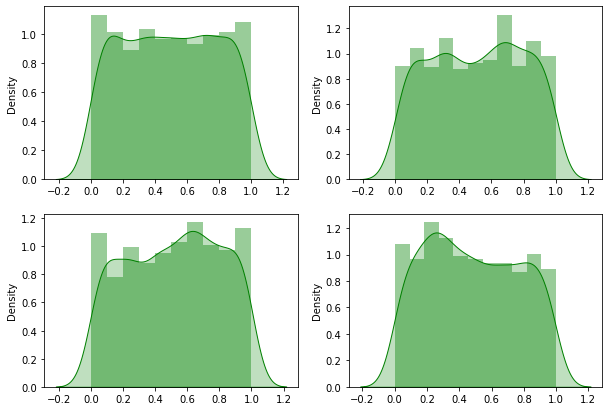

In [69]:
show_distribution(random.random)

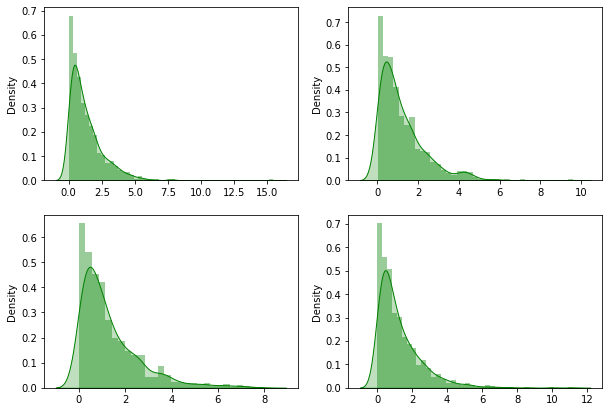

In [75]:
show_distribution(lambda : random.expovariate(.8))

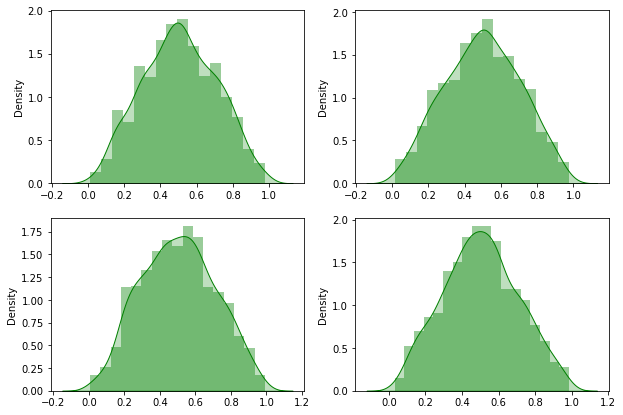

In [76]:
show_distribution(lambda : random.triangular(0,1,.5))

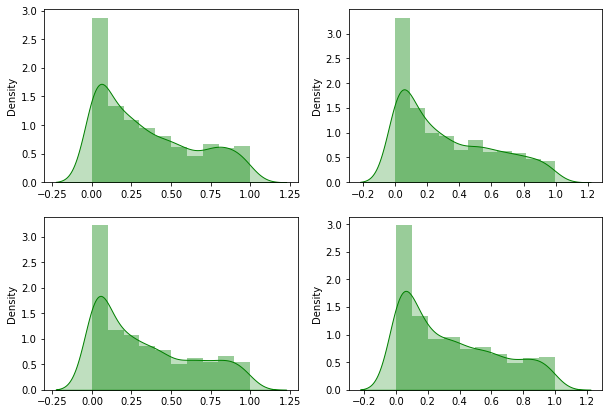

In [81]:
show_distribution(lambda: random.betavariate(0.5,1))

Send 1M of data as a response to POST request
Input: number of megabutes in response
Let's explore the range of output:

In [2]:
import aiohttp
import asyncio
import time

In [3]:
ENDPOINT_URL = 'https://young-brook-87857.herokuapp.com/getPayload/1'

In [4]:
delays=[]
async def main():

    async with aiohttp.ClientSession() as session:
        start = time.perf_counter()
        async with session.post(ENDPOINT_URL) as response:
            delay = time.perf_counter() - start
            delays.append(delay)

In [5]:
loop = asyncio.get_event_loop()
tasks = [loop.create_task(main()) for _ in range(50)]

In [6]:
delays[:10]

[0.5768295250018127,
 0.5820293309989211,
 0.5873200749992975,
 0.5982675300001574,
 0.6052687609990244,
 0.6052234560011129,
 0.6581617400006508,
 0.6220553569983167,
 0.6220286520001537,
 0.6232456180005101]

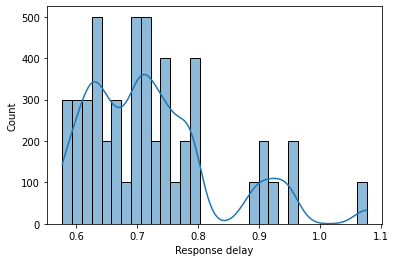

In [14]:
ax = plt.subplot(1,1,1)
ax.set_xlabel('Response delay')
sns.histplot(delays*100, kde=True, ax=ax)
plt.show()

In [21]:
np.array(delays).mean()

0.723532935500043

In [20]:
np.array(delays).std()

0.10849354449155102

In [129]:
MAX = 10*10**6  #10M

In [131]:
import threading

In [142]:
number = 0

def roulete():
    global number
    while True:
        number = (number+1) % MAX

In [143]:
x = threading.Thread(target=roulete)

In [144]:
x.start()

In [168]:
import requests
values = []

for _ in range(1000):
    requests.get(ENDPOINT_URL)
    values.append(number)

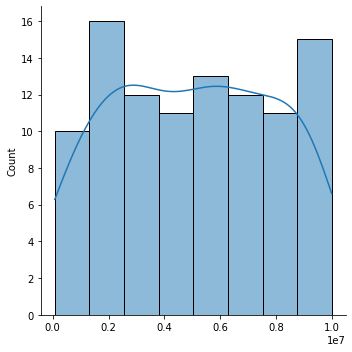

In [167]:
sns.displot(values, kde = True)

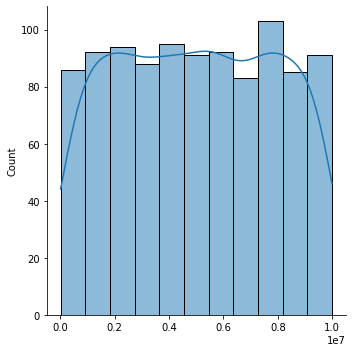

In [169]:
sns.displot(values, kde = True)

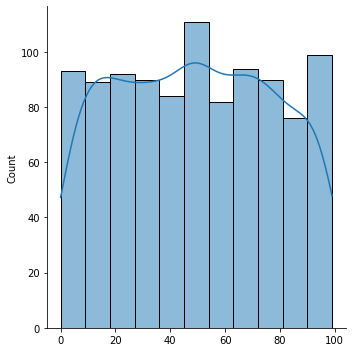

In [173]:
sns.displot(np.array(values) % 100, kde = True)

In [22]:
numbers=[]
async def main():
    async with aiohttp.ClientSession() as session:
        async with session.get("https://calm-fortress-94432.herokuapp.com/getRandom/10000000") as response:
            data = await response.json()
            number = data["number"]
            print(number)
            numbers.append(number)

In [33]:
all_numbers = []

In [34]:
loop = asyncio.get_event_loop()
tasks = [loop.create_task(main()) for _ in range(100)]

Task exception was never retrieved
future: <Task finished name='Task-846' coro=<main() done, defined at /var/folders/bs/kcgn_7s15t92yb4qgfl7c62c0000gn/T/ipykernel_75659/1535589272.py:2> exception=ClientConnectorError(ConnectionKey(host='calm-fortress-94432.herokuapp.com', port=443, is_ssl=True, ssl=None, proxy=None, proxy_auth=None, proxy_headers_hash=None), gaierror(8, 'nodename nor servname provided, or not known'))>
Traceback (most recent call last):
  File "/Users/kovalas/Kaggle/env/lib/python3.9/site-packages/aiohttp/connector.py", line 999, in _create_direct_connection
    hosts = await asyncio.shield(host_resolved)
  File "/Users/kovalas/Kaggle/env/lib/python3.9/site-packages/aiohttp/connector.py", line 865, in _resolve_host
    addrs = await self._resolver.resolve(host, port, family=self._family)
  File "/Users/kovalas/Kaggle/env/lib/python3.9/site-packages/aiohttp/resolver.py", line 31, in resolve
    infos = await self._loop.getaddrinfo(
  File "/usr/local/Cellar/python@3.9/3

4602870
6138466
4877537
5055396
6985327
5246843
7294799
5841717
6298828
7877105
7995337
6427225
8149001
6678356
8186207
6979395
7171614
8348799
7360124
7525708
8510515
8690495
7931897
8877489
8410111
9090203
9170577
8805197
9281893
8979537
9560799
9131083
9632573
9227288
9746368
9331170
9861164
9990203
9432432
168823
9732910
405177
586253
37478
922466
177795
338884
1040158
632586
1143948
1169237
1278591
1421165
1373283
1568405
1585811
1910095
1895665
2381002
2281263
2722172
2546923
3057893
3207915
2773418
3365623
3467809
2911646
3599104
3225560
3989267
3861651
4676813
4270110
4374292
4476547
4848723
4606034
5106893
4741087
5016289
5300882
5869260
5630004
6833646
6524110
6666995
7231781
6927567
6987512
7422207
7092829
7254114
7690104
7512817
8129793
7942936
8324461
8503838
8920792


In [35]:
all_numbers = all_numbers+numbers

In [36]:
len(all_numbers)

398

<AxesSubplot:ylabel='Density'>

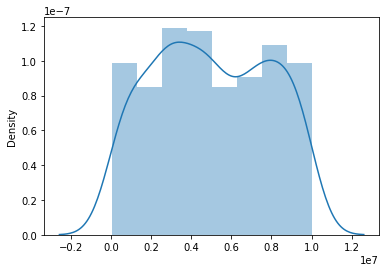

In [37]:
sns.distplot(all_numbers, kde=True)

In [38]:
np.array(all_numbers).std()

2865127.684251482

In [39]:
np.array(all_numbers).mean()

5016296.314070351

In [40]:
!pwd

/Users/kovalas/Kaggle/titanic
